In [1]:
import geoplot as gplt
import geoplot.crs as gcrs

import mapclassify as mc

import contextily as ctx

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

fp = "../data_archive/population_admin_units.shp"

acc = gpd.read_file(fp)
acc['pop_int'] = acc['population'].apply(pd.to_numeric, errors='coerce').dropna()
acc_wgs84 = acc.to_crs(4326)

Text(0.5, 1.0, 'Population per municipality')

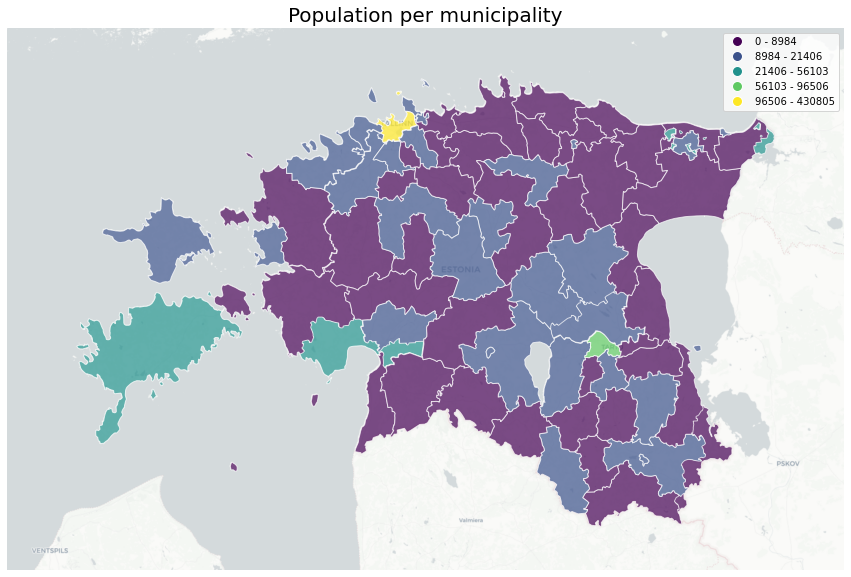

In [3]:
# receive the **ax** object from a ``geoplot gplt.*`` function
ax = gplt.webmap(df=acc_wgs84, projection=gcrs.WebMercator(), zoom=8, provider=ctx.providers.CartoDB.Positron, figsize=(15,12))

# create classifier
scheme = mc.FisherJenks(acc_wgs84[['pop_int']], k=5)

# create choropleth plot, inserting the classifieras scheme and the ax object like we are used to
gplt.choropleth(
    acc_wgs84, hue='pop_int', projection=gcrs.WebMercator(),
    edgecolor='white', linewidth=1, alpha=0.7,
    cmap='viridis', legend=True,
    ax=ax,
    scheme=scheme
)

# set a title
plt.title("Population per municipality", fontsize=20)

Text(0.5, 1.0, 'Population per municipality as cartogram')

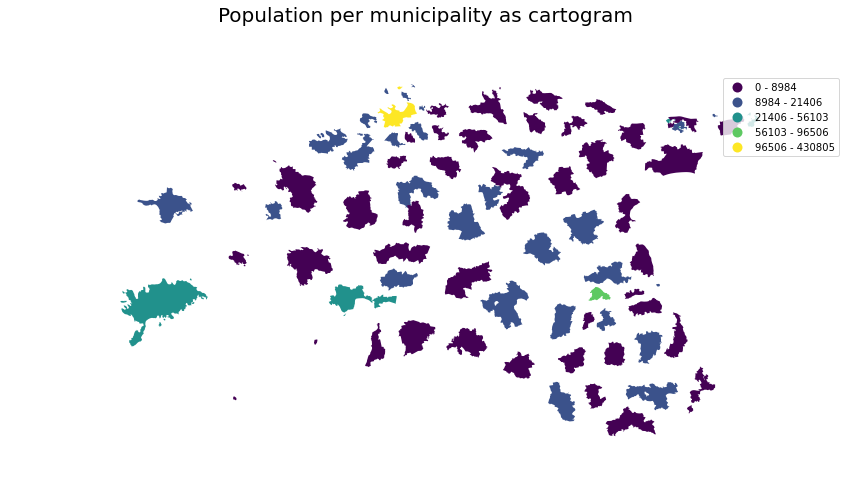

In [4]:

# again, we need to take the ax object with us to the next plot
# we also reuse the scheme mc classifier
# hue tells from which column to take the value
ax = gplt.cartogram(
    acc_wgs84, scale='pop_int', projection=gcrs.AlbersEqualArea(),
    legend=True, legend_kwargs={'bbox_to_anchor': (1, 0.9)}, legend_var='hue',
    hue='pop_int',
    scheme=scheme,
    cmap='viridis',
    limits=(0.5, 1),
    figsize=(15,12)
)
# for comparison we also plot the original size boundaries
gplt.polyplot(acc_wgs84, facecolor='white', edgecolor='white', alpha=0.8, ax=ax)

plt.title("Population per municipality as cartogram", fontsize=20)

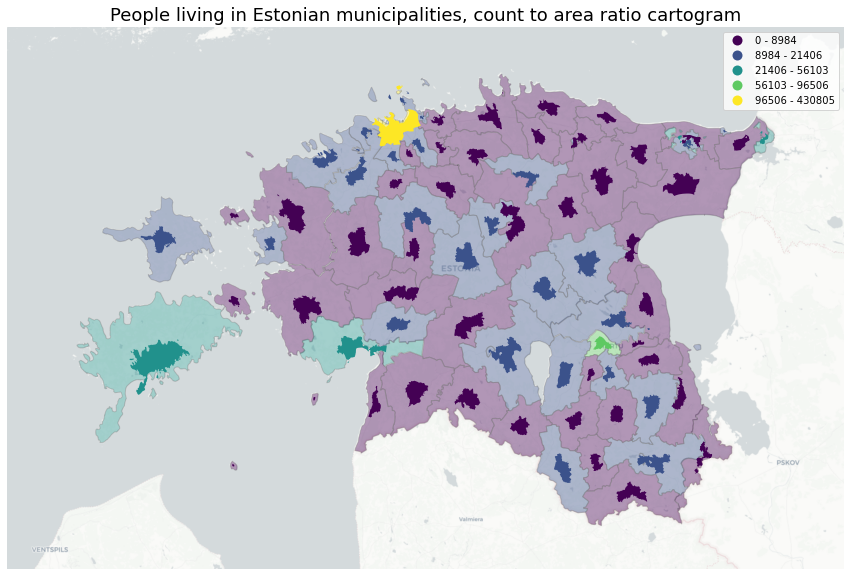

In [16]:
ax = gplt.webmap(df=acc_wgs84, projection=gcrs.WebMercator(), zoom=8, provider=ctx.providers.CartoDB.Positron, figsize=(15,12))

# create classifier
scheme = mc.FisherJenks(acc_wgs84[['pop_int']], k=5)

gplt.choropleth(
    acc_wgs84, hue='pop_int', projection=gcrs.WebMercator(),
    edgecolor='gray', linewidth=1, alpha=0.4,
    cmap='viridis',
    ax=ax,
    scheme=scheme
)

ax = gplt.cartogram(
    acc_wgs84, scale='pop_int', projection=gcrs.AlbersEqualArea(),
    legend=True, legend_kwargs={'bbox_to_anchor': (1, 1)}, legend_var='hue',
    hue='pop_int',
    scheme=scheme,
    cmap='viridis',
    limits=(0.3, 1.2),
    ax=ax
)

# set a title
plt.title("People living in Estonian municipalities, count to area ratio cartogram", fontsize=18)
plt.savefig("../source/_static/day-20-population.png", bbox_inches='tight')